<IPython.core.display.Javascript object>


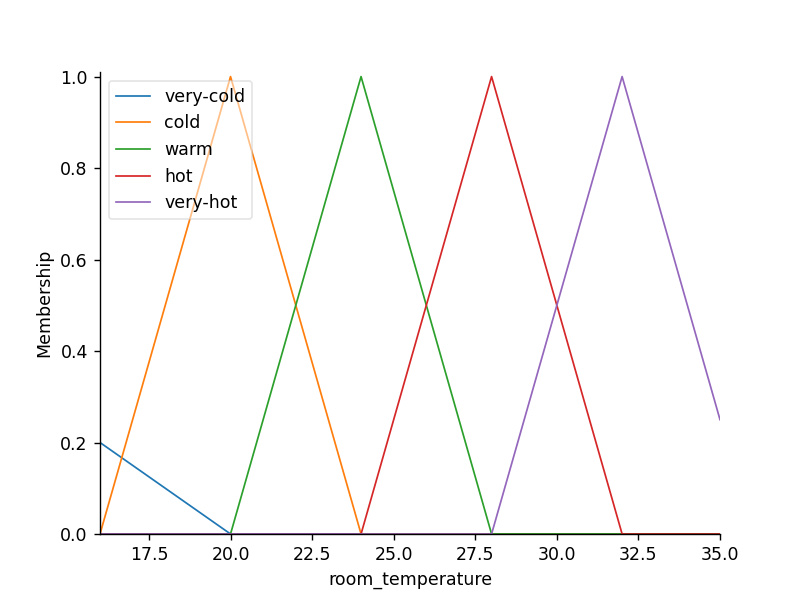

Enter room temperature:30


<IPython.core.display.Javascript object>


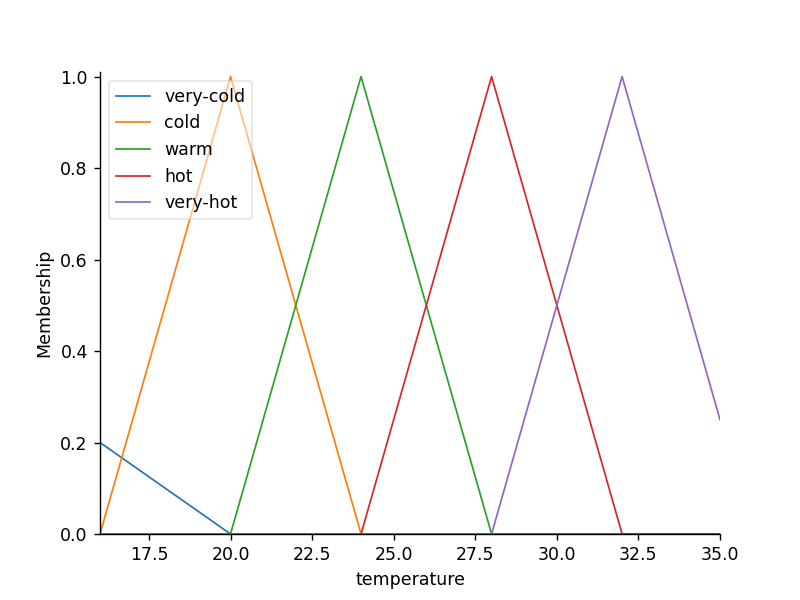

Enter target temperature:25


<IPython.core.display.Javascript object>


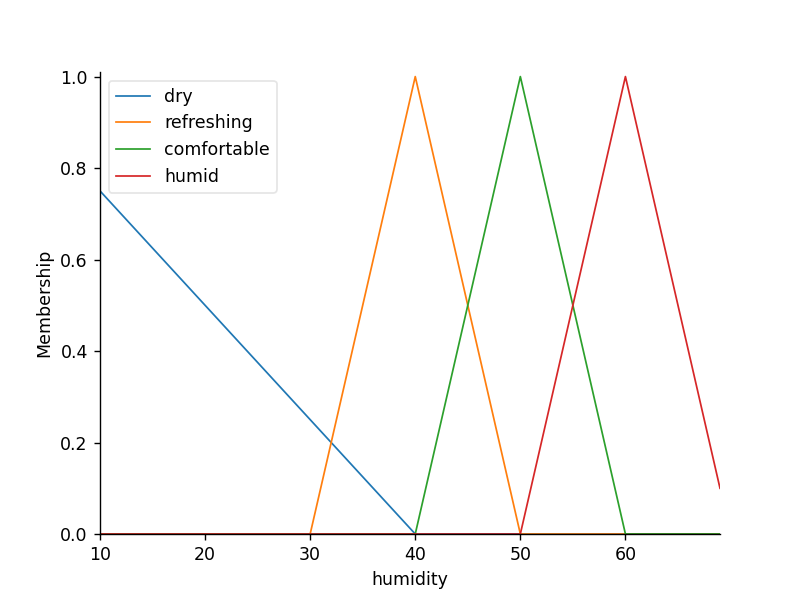

Enter humidity:40


<IPython.core.display.Javascript object>


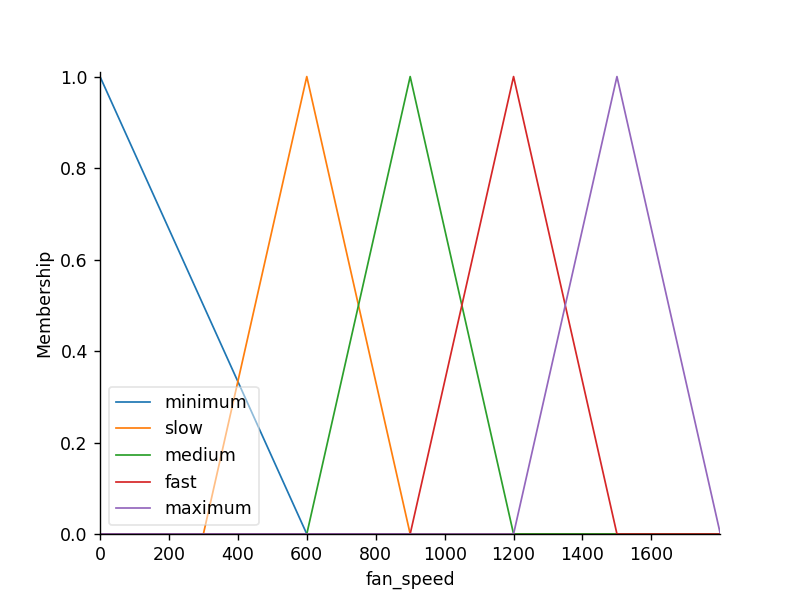

<IPython.core.display.Javascript object>


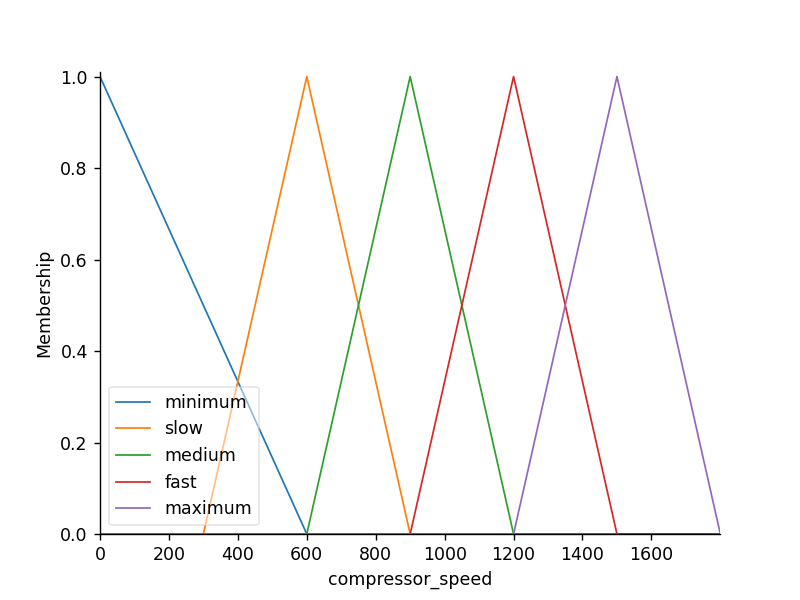

Press Enter For Processing Rules
Press Enter to View Fan Speed
Fan Speed 1046.9374106196394 RPM


<IPython.core.display.Javascript object>


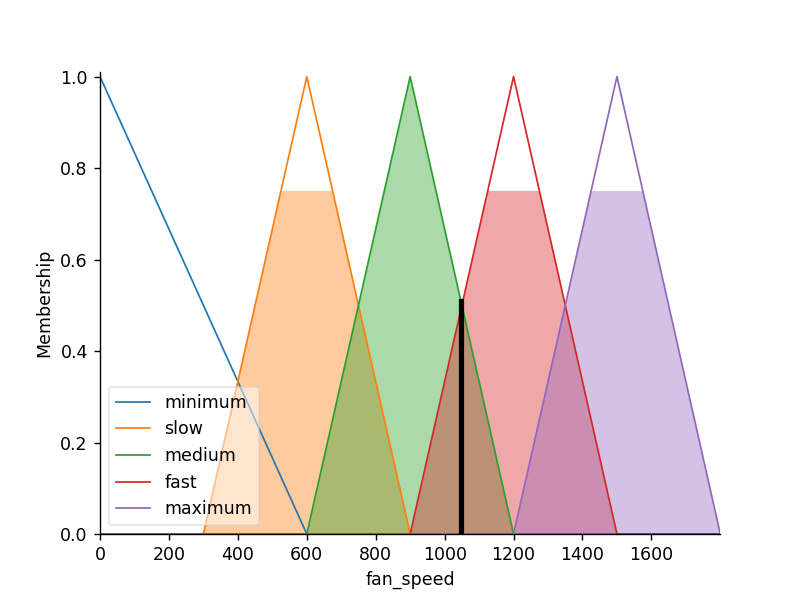

Press Enter to View Compressor Speed
Compressor Speed 1166.6651045228907 RPM


<IPython.core.display.Javascript object>


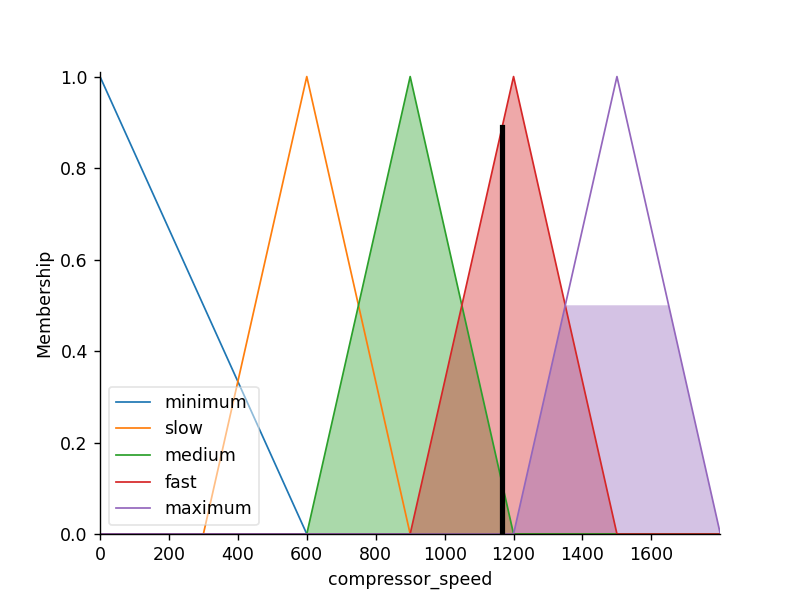

Press any key to exit!


''

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib notebook

room_temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'room_temperature')
temperature = ctrl.Antecedent(np.arange(16, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(10, 70, 1), 'humidity')
oxygen_level = ctrl.Antecedent(np.arange(15, 50, 1), 'oxygen_level')
fan_speed = ctrl.Consequent(np.arange(0, 1800, 1), 'fan_speed')
compressor_speed = ctrl.Consequent(np.arange(0, 1800, 1), 'compressor_speed')

room_temperature['very-cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
room_temperature['cold'] = fuzz.trimf(temperature.universe, [16, 20, 24])
room_temperature['warm'] = fuzz.trimf(temperature.universe, [20, 24, 28])
room_temperature['hot'] = fuzz.trimf(temperature.universe, [24, 28, 32])
room_temperature['very-hot'] = fuzz.trimf(temperature.universe, [28, 32, 36])
# print("room_temperature", room_temperature.universe)

temperature['very-cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['cold'] = fuzz.trimf(temperature.universe, [16, 20, 24])
temperature['warm'] = fuzz.trimf(temperature.universe, [20, 24, 28])
temperature['hot'] = fuzz.trimf(temperature.universe, [24, 28, 32])
temperature['very-hot'] = fuzz.trimf(temperature.universe, [28, 32, 36])
# print("temperature", temperature.universe)

humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['refreshing'] = fuzz.trimf(humidity.universe, [30, 40, 50])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [40, 50, 60])
humidity['humid'] = fuzz.trimf(humidity.universe, [50, 60, 70])
# print("humidity", humidity.universe)

oxygen_level['low'] = fuzz.trimf(oxygen_level.universe, [0, 0, 20])
oxygen_level['medium'] = fuzz.trimf(oxygen_level.universe, [10, 20, 30])
oxygen_level['high'] = fuzz.trimf(oxygen_level.universe, [30, 40, 50])
# print("oxygen_level", oxygen_level.universe)

fan_speed['minimum'] = fuzz.trimf(fan_speed.universe, [0, 0, 600])
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [300, 600, 900])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [600, 900, 1200])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [900, 1200, 1500])
fan_speed['maximum'] = fuzz.trimf(fan_speed.universe, [1200, 1500, 1800])
# print("fan_speed", fan_speed.universe)

compressor_speed['minimum'] = fuzz.trimf(fan_speed.universe, [0, 0, 600])
compressor_speed['slow'] = fuzz.trimf(fan_speed.universe, [300, 600, 900])
compressor_speed['medium'] = fuzz.trimf(fan_speed.universe, [600, 900, 1200])
compressor_speed['fast'] = fuzz.trimf(fan_speed.universe, [900, 1200, 1500])
compressor_speed['maximum'] = fuzz.trimf(fan_speed.universe, [1200, 1500, 1800])


# print("compressor_speed", compressor_speed.universe)

def get_fan_speed_control_rules():
    rule1a = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['humid'],
        fan_speed['maximum']
    )
    rule1b = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['comfortable'],
        fan_speed['fast']
    )
    rule1c = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['refreshing'],
        fan_speed['medium']
    )
    rule1d = ctrl.Rule(
        room_temperature['very-hot'] | temperature['very-cold'] | humidity['dry'],
        fan_speed['slow']
    )

    rule2a = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['humid'],
        fan_speed['maximum']
    )
    rule2b = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['comfortable'],
        fan_speed['fast']
    )
    rule2c = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['refreshing'],
        fan_speed['medium']
    )
    rule2d = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['dry'],
        fan_speed['slow']
    )

    rule3a = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['humid'],
        fan_speed['maximum']
    )
    rule3b = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['comfortable'],
        fan_speed['fast']
    )
    rule3c = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['refreshing'],
        fan_speed['medium']
    )
    rule3d = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['dry'],
        fan_speed['slow']
    )

    rule4a = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['humid'],
        fan_speed['maximum']
    )
    rule4b = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['comfortable'],
        fan_speed['fast']
    )
    rule4c = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['refreshing'],
        fan_speed['medium']
    )
    rule4d = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['dry'],
        fan_speed['slow']
    )

    rule5a = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['humid'],
        fan_speed['maximum']
    )
    rule5b = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['comfortable'],
        fan_speed['fast']
    )
    rule5c = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['refreshing'],
        fan_speed['medium']
    )
    rule5d = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['dry'],
        fan_speed['slow']
    )

    return [
        rule1a, rule1b, rule1c, rule1d,
        rule2a, rule2a, rule2b, rule2d,
        rule3a, rule3b, rule3c, rule3d,
        rule4a, rule4b, rule4c, rule4d,
        rule5a, rule5b, rule5c, rule5d
    ]


def get_compressor_speed_control_rules():
    rule1a = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['humid'],
        compressor_speed['maximum']
    )
    rule1b = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['comfortable'],
        compressor_speed['maximum']
    )
    rule1c = ctrl.Rule(
        room_temperature['very-hot'] & temperature['very-cold'] & humidity['refreshing'],
        compressor_speed['maximum']
    )
    rule1d = ctrl.Rule(
        room_temperature['very-hot'] | temperature['very-cold'] | humidity['dry'],
        compressor_speed['maximum']
    )

    rule2a = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['humid'],
        compressor_speed['fast']
    )
    rule2b = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['comfortable'],
        compressor_speed['fast']
    )
    rule2c = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['refreshing'],
        compressor_speed['fast']
    )
    rule2d = ctrl.Rule(
        room_temperature['very-hot'] | temperature['cold'] | humidity['dry'],
        compressor_speed['fast']
    )

    rule3a = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['humid'],
        compressor_speed['fast']
    )
    rule3b = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['comfortable'],
        compressor_speed['fast']
    )
    rule3c = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['refreshing'],
        compressor_speed['fast']
    )
    rule3d = ctrl.Rule(
        room_temperature['hot'] | temperature['cold'] | humidity['dry'],
        compressor_speed['fast']
    )

    rule4a = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['humid'],
        compressor_speed['medium']
    )
    rule4b = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['comfortable'],
        compressor_speed['medium']
    )
    rule4c = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['refreshing'],
        compressor_speed['medium']
    )
    rule4d = ctrl.Rule(
        room_temperature['warm'] | temperature['cold'] | humidity['dry'],
        compressor_speed['medium']
    )

    rule5a = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['humid'],
        compressor_speed['medium']
    )
    rule5b = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['comfortable'],
        compressor_speed['medium']
    )
    rule5c = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['refreshing'],
        compressor_speed['medium']
    )
    rule5d = ctrl.Rule(
        room_temperature['cold'] | temperature['warm'] | humidity['dry'],
        compressor_speed['medium']
    )

    return [
        rule1a, rule1b, rule1c, rule1d,
        rule2a, rule2a, rule2b, rule2d,
        rule3a, rule3b, rule3c, rule3d,
        rule4a, rule4b, rule4c, rule4d,
        rule5a, rule5b, rule5c, rule5d
    ]


ac_ctrl = ctrl.ControlSystem(
    get_fan_speed_control_rules() + get_compressor_speed_control_rules()
)

room_temperature.view()
in_rt = input("Enter room temperature:")

temperature.view()
in_tt = input("Enter target temperature:")

humidity.view()
in_hd = input("Enter humidity:")

# oxygen_level.view()
# in_ol = input("Enter oxygen level:")

fan_speed.view()
compressor_speed.view()

input('Press Enter For Processing Rules')
speed = ctrl.ControlSystemSimulation(ac_ctrl)
speed.input['room_temperature'] = int(in_rt)
speed.input['temperature'] = int(in_tt)
speed.input['humidity'] = int(in_hd)
speed.compute()

input('Press Enter to View Fan Speed')
print("Fan Speed", f"{speed.output['fan_speed']} RPM")
fan_speed.view(sim=speed)

input('Press Enter to View Compressor Speed')
print("Compressor Speed", f"{speed.output['compressor_speed']} RPM")
compressor_speed.view(sim=speed)

input('Press any key to exit!')